In [1]:
# import neccessary libraries
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 
pd.set_option('display.max_columns',None)

# Loading the Data and Cleaning

In [3]:
# Loading data
path = 'games.csv'
df = pd.read_csv(path)

In [5]:
# Checking data shape
df.shape

(26651, 21)

In [7]:
# See the first few rows 
df.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,0.382,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1610612762,120.0,0.488,0.952,0.457,16.0,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,1610612739,114.0,0.482,0.786,0.313,22.0,37.0,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,1
3,2022-12-21,22200467,Final,1610612755,1610612765,2022,1610612755,113.0,0.441,0.909,0.297,27.0,49.0,1610612765,93.0,0.392,0.735,0.261,15.0,46.0,1
4,2022-12-21,22200468,Final,1610612737,1610612741,2022,1610612737,108.0,0.429,1.000,0.378,22.0,47.0,1610612741,110.0,0.500,0.773,0.292,20.0,47.0,0


In [9]:
# Checking attributes (columns)
df.columns

Index(['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID',
       'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home', 'FG_PCT_home',
       'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away',
       'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away',
       'REB_away', 'HOME_TEAM_WINS'],
      dtype='object')

In [11]:
# Summary of data statistics
df.describe()

,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
count,2.665100e+04,2.665100e+04,2.665100e+04,26651.000000,2.665100e+04,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,2.665100e+04,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,26651.000000
mean,2.175487e+07,1.610613e+09,1.610613e+09,2012.113879,1.610613e+09,103.455898,0.460735,0.760377,0.356023,22.823441,43.374284,1.610613e+09,100.639876,0.449732,0.758816,0.349489,21.496271,42.113249,0.587032
std,5.570189e+06,8.638670e+00,8.659299e+00,5.587031,8.638670e+00,13.283370,0.056676,0.100677,0.111164,5.193308,6.625769,8.659299e+00,13.435868,0.055551,0.103429,0.109441,5.160596,6.533039,0.492376
min,1.030000e+07,1.610613e+09,1.610613e+09,2003.000000,1.610613e+09,36.000000,0.250000,0.143000,0.000000,6.000000,15.000000,1.610613e+09,33.000000,0.244000,0.143000,0.000000,4.000000,19.000000,0.000000
25%,2.070001e+07,1.610613e+09,1.610613e+09,2007.000000,1.610613e+09,94.000000,0.422000,0.697000,0.286000,19.000000,39.000000,1.610613e+09,91.000000,0.412000,0.692000,0.278000,18.000000,38.000000,0.000000
50%,2.120076e+07,1.610613e+09,1.610613e+09,2012.000000,1.610613e+09,103.000000,0.460000,0.765000,0.357000,23.000000,43.000000,1.610613e+09,100.000000,0.449000,0.765000,0.350000,21.000000,42.000000,1.000000
75%,2.180005e+07,1.610613e+09,1.610613e+09,2017.000000,1.610613e+09,112.000000,0.500000,0.833000,0.429000,26.000000,48.000000,1.610613e+09,110.000000,0.487000,0.833000,0.419000,25.000000,46.000000,1.000000
max,5.210021e+07,1.610613e+09,1.610613e+09,2022.000000,1.610613e+09,168.000000,0.684000,1.000000,1.000000,50.000000,72.000000,1.610613e+09,168.000000,0.687000,1.000000,1.000000,46.000000,81.000000,1.000000


In [13]:
# Concise summary of a dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26651 entries, 0 to 26650
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     26651 non-null  object 
 1   GAME_ID           26651 non-null  int64  
 2   GAME_STATUS_TEXT  26651 non-null  object 
 3   HOME_TEAM_ID      26651 non-null  int64  
 4   VISITOR_TEAM_ID   26651 non-null  int64  
 5   SEASON            26651 non-null  int64  
 6   TEAM_ID_home      26651 non-null  int64  
 7   PTS_home          26552 non-null  float64
 8   FG_PCT_home       26552 non-null  float64
 9   FT_PCT_home       26552 non-null  float64
 10  FG3_PCT_home      26552 non-null  float64
 11  AST_home          26552 non-null  float64
 12  REB_home          26552 non-null  float64
 13  TEAM_ID_away      26651 non-null  int64  
 14  PTS_away          26552 non-null  float64
 15  FG_PCT_away       26552 non-null  float64
 16  FT_PCT_away       26552 non-null  float6

In [15]:
# Selecting relevant data into data frame
# Exclude SEASON,GAME_STATUS_TEXT, TEAM_ID_HOME, VISITOR_TEAM_ID, PTS_home, PTS_away
nba_df= df[[ 'SEASON',
            'FG_PCT_home',
            'FT_PCT_home',
            'FG3_PCT_home',
            'AST_home',
            'REB_home',
            'FG_PCT_away', 
            'FT_PCT_away', 
            'FG3_PCT_away', 
            'AST_away',
            'REB_away',
            'HOME_TEAM_WINS']].rename(columns={
            'SEASON':'season',
            'FG_PCT_home':'fg_pct_home',
            'FT_PCT_home':'ft_pct_home',
            'FG3_PCT_home':'fg3_pct_home',
            'AST_home':'ast_home',
            'REB_home':'reb_home', 
            'FG_PCT_away':'fg_pct_away', 
            'FT_PCT_away':'ft_pct_away', 
            'FG3_PCT_away':'fg3_pct_away', 
            'AST_away':'ast_away',
            'REB_away':'reb_away',
            'HOME_TEAM_WINS':'home_team_wins'
})

In [17]:
# Count of nulls in each column 
print(nba_df.isna().sum())

season             0
fg_pct_home       99
ft_pct_home       99
fg3_pct_home      99
ast_home          99
reb_home          99
fg_pct_away       99
ft_pct_away       99
fg3_pct_away      99
ast_away          99
reb_away          99
home_team_wins     0
dtype: int64


In [19]:
# Checking duplicated rows 
nba_df[nba_df.duplicated()]

,season,fg_pct_home,ft_pct_home,fg3_pct_home,ast_home,reb_home,fg_pct_away,ft_pct_away,fg3_pct_away,ast_away,reb_away,home_team_wins
19176,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
19177,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
19178,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
19179,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
19180,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19269,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
19270,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
19271,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
19278,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [21]:
# Dropping null values 
# Only dropping 99 rows (~0.37%), so you won’t lose much data
# These rows likely represent games that were cancelled, unfinished, or didn't have complete box scores
# Imputing values would inject noise or unrealistic data in key predictors and it not ideal for stats 
# like points or FG%, which are highly variable game-to-game
nba_cleaned = nba_df.dropna()
print(nba_cleaned.shape)

(26552, 12)


In [23]:
# Splitting data 
from sklearn.model_selection import train_test_split
X = nba_cleaned.drop(columns = ['home_team_wins','season'])
y = nba_cleaned['home_team_wins'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state = 42)

In [25]:
print(X.columns)

Index(['fg_pct_home', 'ft_pct_home', 'fg3_pct_home', 'ast_home', 'reb_home',
       'fg_pct_away', 'ft_pct_away', 'fg3_pct_away', 'ast_away', 'reb_away'],
      dtype='object')


# Logistic Regression (Without Pre-Processing)

In [26]:
 from sklearn.linear_model import LogisticRegression

# Define function 
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [27]:
logreg.score(X_train, y_train), logreg.score(X_test, y_test)

(0.8395566555471861, 0.8366808937986442)

# Support Vector Machine (Without Pre-Processing)

In [8]:
from sklearn.svm import LinearSVC

# Define function 
linear_svc = LinearSVC(random_state=0)

linear_svc.fit(X_train, y_train) 

LinearSVC(random_state=0)

In [9]:
linear_svc.score(X_train, y_train), linear_svc.score(X_test, y_test)

(0.8071128806628646, 0.808812452924931)

# Decision Tree (Without Pre-Processing)

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [33]:
dt.score(X_train, y_train), dt.score(X_test, y_test)

(1.0, 0.7673863921667086)

# Visualization

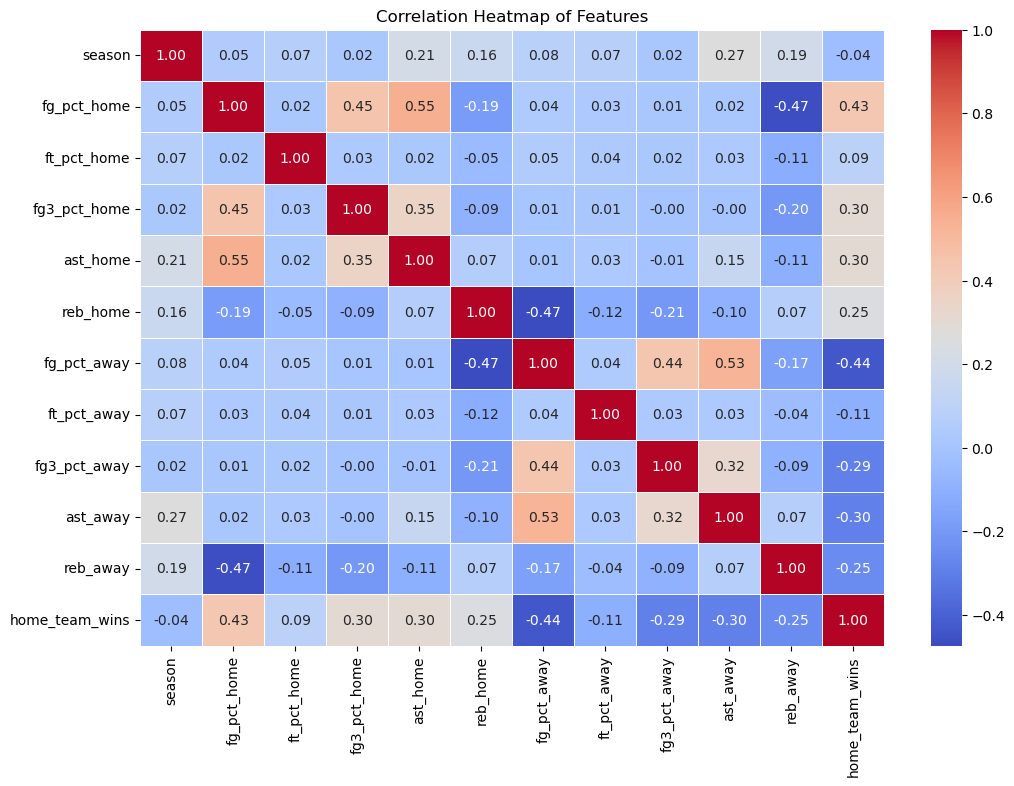

In [34]:
# Create a heatmap of correlations
corr = nba_cleaned.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

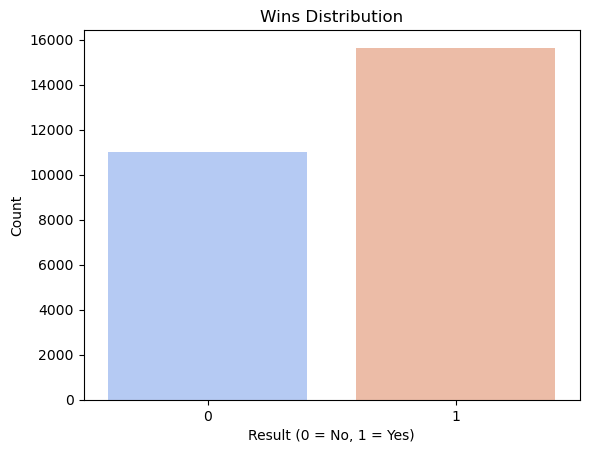

In [36]:
sns.countplot(x=nba_df['home_team_wins'], palette='coolwarm')
plt.title('Wins Distribution')
plt.xlabel('Result (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [38]:
nba_cleaned.head()

,season,fg_pct_home,ft_pct_home,fg3_pct_home,ast_home,reb_home,fg_pct_away,ft_pct_away,fg3_pct_away,ast_away,reb_away,home_team_wins
0,2022,0.484,0.926,0.382,25.0,46.0,0.478,0.815,0.321,23.0,44.0,1
1,2022,0.488,0.952,0.457,16.0,40.0,0.561,0.765,0.333,20.0,37.0,1
2,2022,0.482,0.786,0.313,22.0,37.0,0.470,0.682,0.433,20.0,46.0,1
3,2022,0.441,0.909,0.297,27.0,49.0,0.392,0.735,0.261,15.0,46.0,1
4,2022,0.429,1.000,0.378,22.0,47.0,0.500,0.773,0.292,20.0,47.0,0


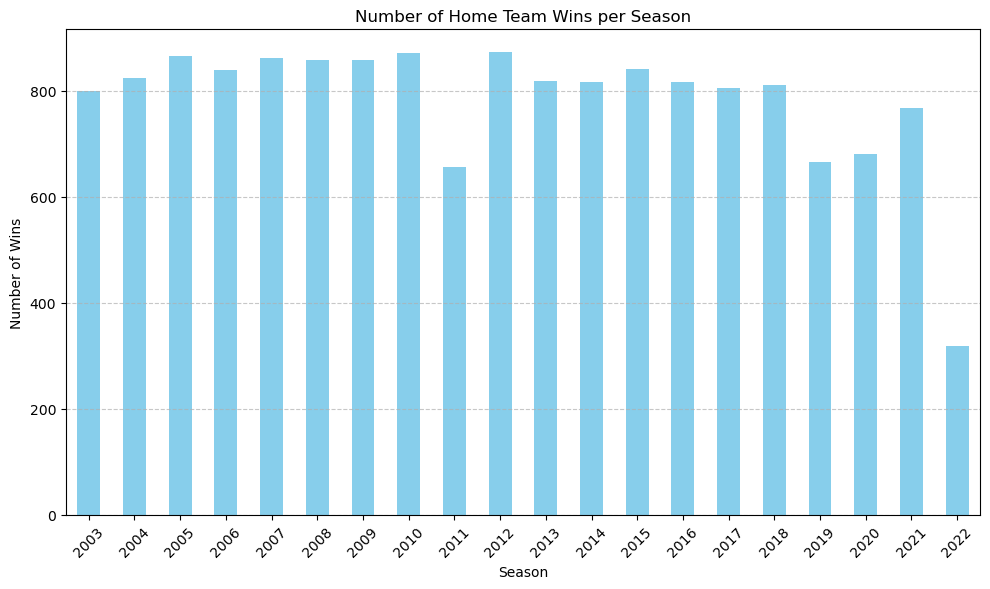

In [39]:
# Filter only games where the home team won
home_wins = nba_df[nba_df['home_team_wins'] == 1]

# Group by season and sum the home_team_wins
wins_per_season = home_wins.groupby('season')['home_team_wins'].sum()

# Plotting
plt.figure(figsize=(10, 6))
wins_per_season.plot(kind='bar', color='skyblue', legend=False)

plt.title('Number of Home Team Wins per Season')
plt.xlabel('Season')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

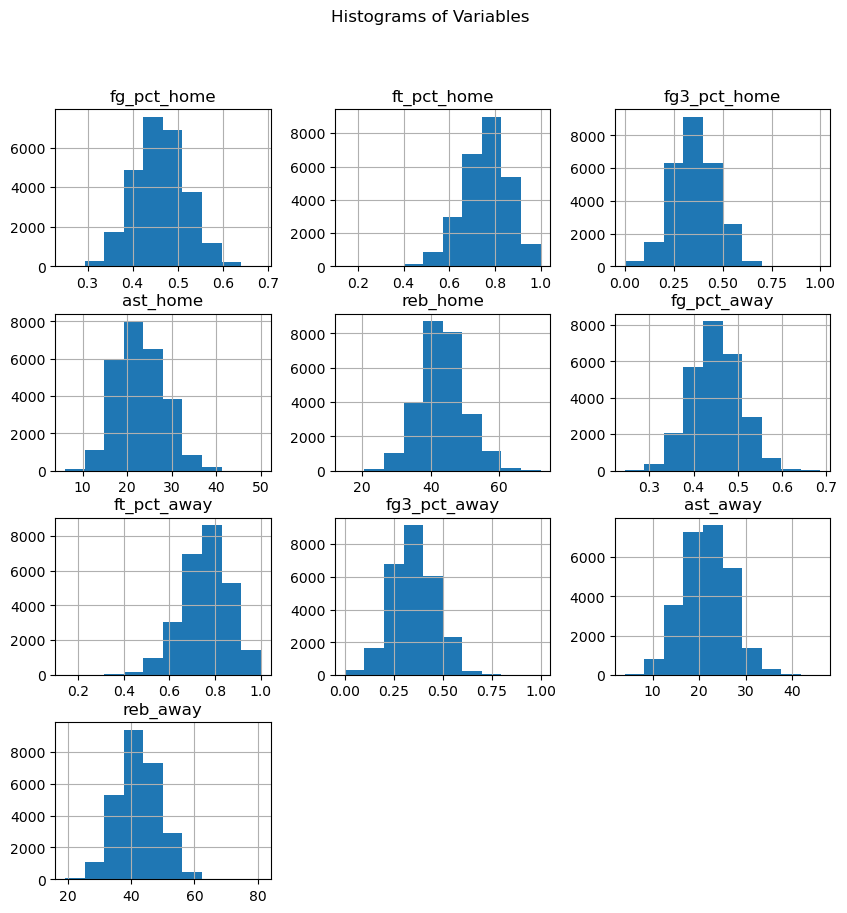

In [73]:
# Plotting histograms
df = X
df.hist(bins=10, figsize=(10, 10))
plt.suptitle("Histograms of Variables")
plt.show()

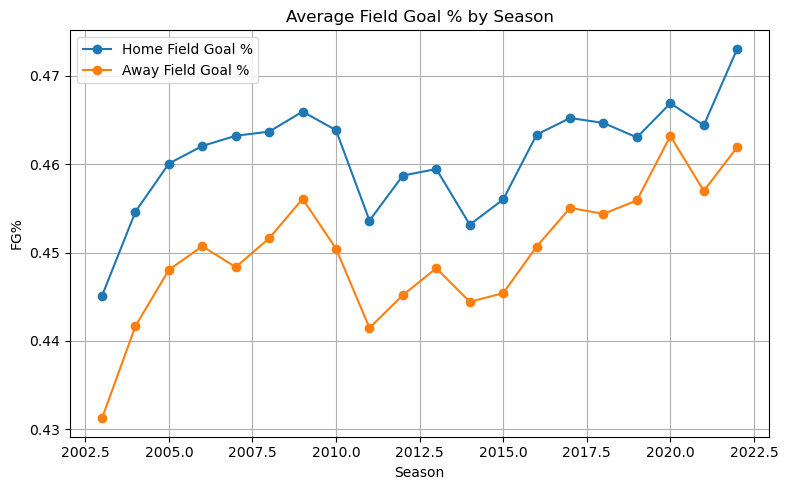

In [40]:
# Group by season and calculate average FG%
fg_season_avg = nba_cleaned.groupby("season")[["fg_pct_home", "fg_pct_away"]].mean().reset_index()

# Line plot
plt.figure(figsize=(8, 5))
plt.plot(fg_season_avg["season"], fg_season_avg["fg_pct_home"], marker='o', label="Home Field Goal %")
plt.plot(fg_season_avg["season"], fg_season_avg["fg_pct_away"], marker='o', label="Away Field Goal %")
plt.title("Average Field Goal % by Season")
plt.xlabel("Season")
plt.ylabel("FG%")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


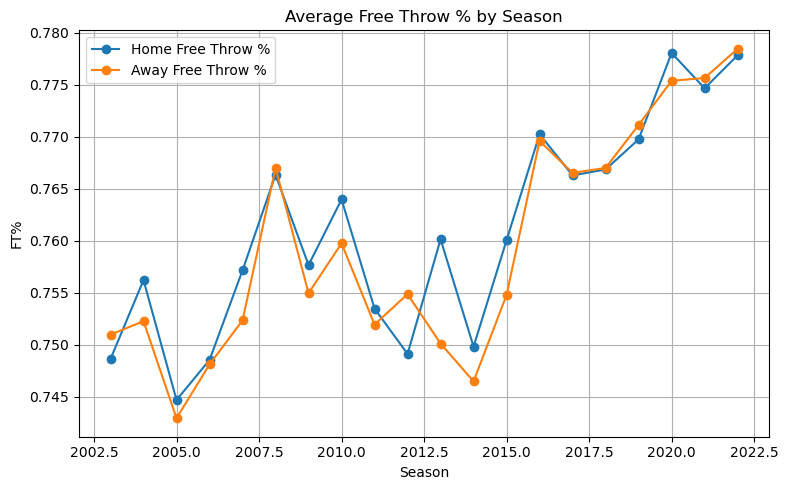

In [75]:
# Group by season and calculate average FT%
ft_season_avg = nba_cleaned.groupby("season")[["ft_pct_home", "ft_pct_away"]].mean().reset_index()

# Line plot
plt.figure(figsize=(8, 5))
plt.plot(ft_season_avg["season"], ft_season_avg["ft_pct_home"], marker='o', label="Home Free Throw %")
plt.plot(ft_season_avg["season"], ft_season_avg["ft_pct_away"], marker='o', label="Away Free Throw %")
plt.title("Average Free Throw % by Season")
plt.xlabel("Season")
plt.ylabel("FT%")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

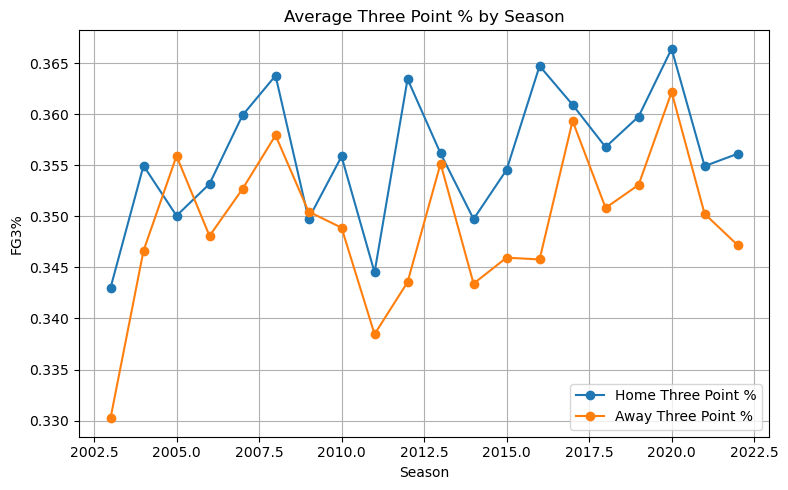

In [76]:
# Group by season and calculate average FT%
fg3_season_avg = nba_cleaned.groupby("season")[["fg3_pct_home", "fg3_pct_away"]].mean().reset_index()

# Line plot
plt.figure(figsize=(8, 5))
plt.plot(fg3_season_avg["season"], fg3_season_avg["fg3_pct_home"], marker='o', label="Home Three Point %")
plt.plot(fg3_season_avg["season"], fg3_season_avg["fg3_pct_away"], marker='o', label="Away Three Point %")
plt.title("Average Three Point % by Season")
plt.xlabel("Season")
plt.ylabel("FG3%")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Decision Tree (GridSearchCV)

In [42]:
# To address the overfitting issue, use GridSearchCV to search for the best combination of these parameter values
from sklearn.model_selection import GridSearchCV

# Base model
opt_tree = DecisionTreeClassifier(random_state = 0)

dt_params = {'max_depth':  range(1,10)         ,
             'min_samples_split':   range(2,11), 
             'max_leaf_nodes':    range(2,11)   }

grid_tree = GridSearchCV(opt_tree, dt_params)
grid_tree.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(1, 10),
                         'max_leaf_nodes': range(2, 11),
                         'min_samples_split': range(2, 11)})

In [44]:
# Show the best hyperparameters chosen
grid_tree.best_params_

{'max_depth': 4, 'max_leaf_nodes': 10, 'min_samples_split': 2}

In [46]:
# Test accuracy of the best decision tree found by GridSearchCV
print(grid_tree.best_estimator_.score(X_test, y_test))

0.7734120010042681


In [48]:
grid_tree.score(X_train, y_train), grid_tree.score(X_test, y_test)

(0.7911869148821694, 0.7734120010042681)

|--- fg_pct_home <= 0.47
|   |--- fg_pct_away <= 0.45
|   |   |--- fg_pct_home <= 0.41
|   |   |   |--- fg_pct_away <= 0.40
|   |   |   |   |--- class: 1
|   |   |   |--- fg_pct_away >  0.40
|   |   |   |   |--- class: 0
|   |   |--- fg_pct_home >  0.41
|   |   |   |--- fg_pct_away <= 0.41
|   |   |   |   |--- class: 1
|   |   |   |--- fg_pct_away >  0.41
|   |   |   |   |--- class: 1
|   |--- fg_pct_away >  0.45
|   |   |--- fg_pct_away <= 0.49
|   |   |   |--- fg_pct_home <= 0.42
|   |   |   |   |--- class: 0
|   |   |   |--- fg_pct_home >  0.42
|   |   |   |   |--- class: 0
|   |   |--- fg_pct_away >  0.49
|   |   |   |--- class: 0
|--- fg_pct_home >  0.47
|   |--- fg_pct_away <= 0.48
|   |   |--- class: 1
|   |--- fg_pct_away >  0.48
|   |   |--- fg_pct_home <= 0.52
|   |   |   |--- class: 0
|   |   |--- fg_pct_home >  0.52
|   |   |   |--- class: 1



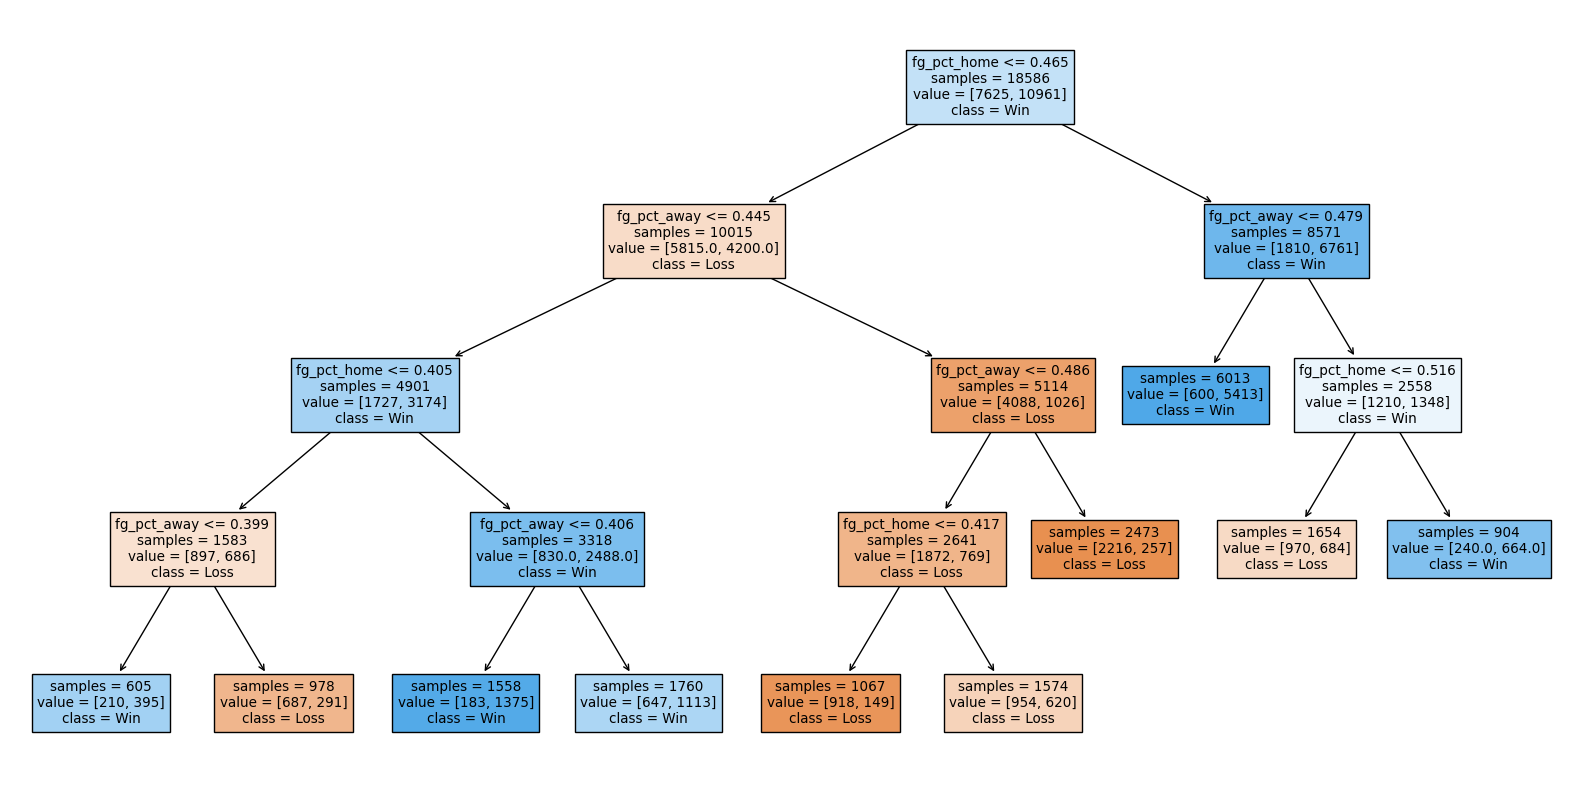

In [50]:
# Visualize the new decision tree
from sklearn import tree
print(tree.export_text(grid_tree.best_estimator_, feature_names = X_train.columns.tolist()))

# Plot the best decision tree
plt.figure(figsize = (20, 10))
tree.plot_tree(
    grid_tree.best_estimator_,
    feature_names = X_train.columns.tolist(),
    class_names = ["Loss", "Win"],
    filled = True, impurity = False)

plt.show()

# Decision Tree (GridSearchCV + Prunning)

In [52]:
# Post-Pruning with max_depth = 4
# Since we got max_depth = 4, now we prune within this limited structure to make the tree even simpler and more robust
from sklearn.tree import DecisionTreeClassifier

# Train a Decision tree model
clf = DecisionTreeClassifier(random_state = 0, max_depth = 4)

# Model training - obtain the path of post-pruning
path = clf.cost_complexity_pruning_path(X_train, y_train)

effective_alphas, impurities = path.ccp_alphas, path.impurities

In [54]:
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(random_state = 0, max_depth = 4)

dt_params = {'ccp_alpha': effective_alphas}

dt_grid = GridSearchCV(dt, dt_params, cv = 5)
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=4, random_state=0),
             param_grid={'ccp_alpha': array([0.        , 0.00024787, 0.00095168, 0.00180549, 0.00265575,
       0.00271303, 0.00271882, 0.00442375, 0.00481885, 0.00507881,
       0.00556503, 0.00648003, 0.01155181, 0.02690205, 0.05380816,
       0.06783537])})

In [56]:
dt_grid.best_params_
# Since I already restricted the tree, the optimal tree is already small or simple and pruning further hurts performance.

{'ccp_alpha': 0.0}

In [58]:
dt_grid.score(X_train, y_train), dt_grid.score(X_test, y_test)

(0.7957602496502744, 0.779688676876726)

|--- fg_pct_home <= 0.47
|   |--- fg_pct_away <= 0.45
|   |   |--- fg_pct_home <= 0.41
|   |   |   |--- fg_pct_away <= 0.40
|   |   |   |   |--- class: 1
|   |   |   |--- fg_pct_away >  0.40
|   |   |   |   |--- class: 0
|   |   |--- fg_pct_home >  0.41
|   |   |   |--- fg_pct_away <= 0.41
|   |   |   |   |--- class: 1
|   |   |   |--- fg_pct_away >  0.41
|   |   |   |   |--- class: 1
|   |--- fg_pct_away >  0.45
|   |   |--- fg_pct_away <= 0.49
|   |   |   |--- fg_pct_home <= 0.42
|   |   |   |   |--- class: 0
|   |   |   |--- fg_pct_home >  0.42
|   |   |   |   |--- class: 0
|   |   |--- fg_pct_away >  0.49
|   |   |   |--- class: 0
|--- fg_pct_home >  0.47
|   |--- fg_pct_away <= 0.48
|   |   |--- class: 1
|   |--- fg_pct_away >  0.48
|   |   |--- fg_pct_home <= 0.52
|   |   |   |--- class: 0
|   |   |--- fg_pct_home >  0.52
|   |   |   |--- class: 1



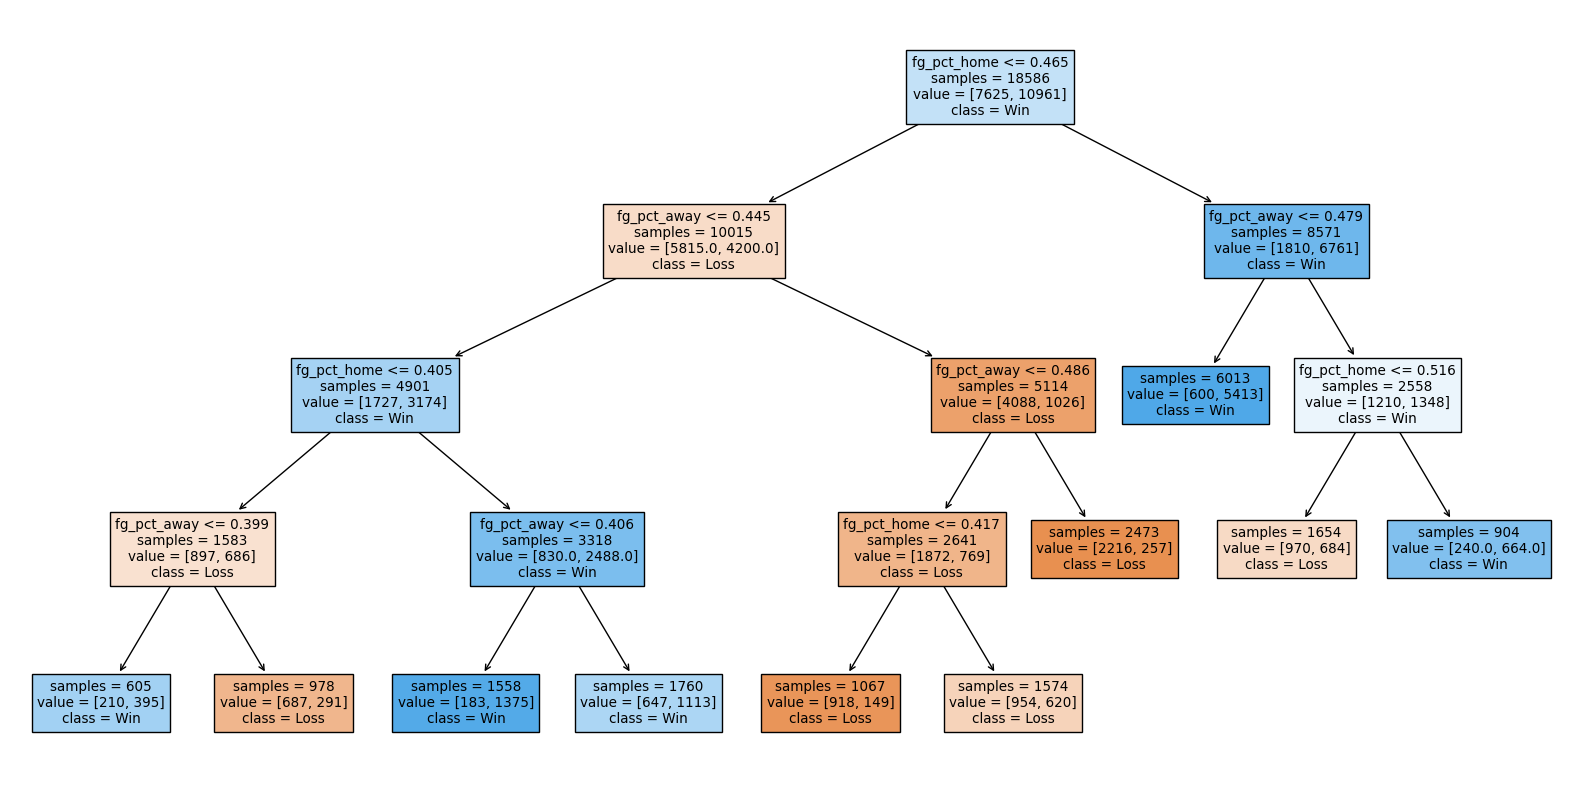

In [60]:
# Visualize the new decision tree
from sklearn import tree
print(tree.export_text(grid_tree.best_estimator_, feature_names = X_train.columns.tolist()))

# Plot the best decision tree
plt.figure(figsize = (20, 10))
tree.plot_tree(
    grid_tree.best_estimator_,
    feature_names = X_train.columns.tolist(),
    class_names = ["Loss", "Win"],
    filled = True, impurity = False)

plt.show()

# Decision Tree (Prunning)

In [62]:
# Post Pruning (without max_depth = 4)
from sklearn.tree import DecisionTreeClassifier

# Train a Decision tree model
clf = DecisionTreeClassifier(random_state = 0)

# Model training - obtain the path of post-pruning
path = clf.cost_complexity_pruning_path(X_train, y_train)

effective_alphas, impurities = path.ccp_alphas, path.impurities

In [64]:
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(random_state = 0)

dt_params = {'ccp_alpha': effective_alphas}

dt_grid = GridSearchCV(dt, dt_params, cv = 5)
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'ccp_alpha': array([0.00000000e+00, 3.51519065e-05, 3.51925132e-05, ...,
       2.69020470e-02, 5.38081601e-02, 6.78353742e-02])})

In [66]:
dt_grid.score(X_train, y_train), dt_grid.score(X_test, y_test)

(0.8527924244054664, 0.8032889781571679)

In [68]:
dt_grid.best_params_

{'ccp_alpha': 0.0002369422965570604}

In [ ]:
# Decision Tree Analysis and Story
# We iterated through two preprocessing techniques to reduce overfitting since raw decision trees overfit easily,
# as you can see without tuning, our model achieved 100% perfect training accuracy. 
# After tuning max_depth, we applied post-pruning using ccp_alpha to further regularize the tree.
# Between the two, Post-Pruning and Hyperparameter Tuning via GridSearchCV, 
# cost-complexity post-pruning was the most impactful, improving test accuracy from 76.7% (untuned) to 80.2% beating our
# parameter tuning max_depth, min_samples_split, and max_leafs_node at 77.3% testing accuracy. 
# Additionally, we evaluated post-pruning both with and without a max_depth constraint. 
# The trade-off is that removing max_depth allowed the tree to grow slightly more and gain higher accuracy (80.2%) 
# at the cost of simplicity or control.
# Based on the decision tree, if your home team shoots better than 46.5%, you’re likely to win. ALso, if you 
# hold your opponent under 44%, your win probability increases dramatically. Through pruning and tuning, 
# we distilled NBA game data into clear, actionable rules that coaching staff such as managers and analysts can use 
# to set goals, assess performance, and even guide live decisions. 
# While the unconstrained version reached a slightly higher test accuracy (80.2%), we selected the pruned tree 
# with max_depth=4 (77.97%) as our final model due to its consistency with prior hyperparameter tuning 
# and its balance of simplicity, interpretability, and performance.

# Standard Scaling 

In [90]:
#Standard Scaling
# We have different scales and distributions, but not bounded between 0 and 1
# Logistic regression (especially with regularization) performs best when features have mean = 0 and standard deviation = 1
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

X_scaled = pd.DataFrame(
    scaler.fit_transform(X),
    columns=X.columns,    
    index=X.index       
)
X_scaled.describe()

,fg_pct_home,ft_pct_home,fg3_pct_home,ast_home,reb_home,fg_pct_away,ft_pct_away,fg3_pct_away,ast_away,reb_away
count,2.655200e+04,2.655200e+04,2.655200e+04,2.655200e+04,2.655200e+04,2.655200e+04,2.655200e+04,2.655200e+04,2.655200e+04,2.655200e+04
mean,7.835452e-16,7.557143e-16,-3.436038e-16,5.138001e-17,-4.581384e-16,-7.814043e-16,9.805019e-16,-4.517159e-16,2.943646e-17,-4.902509e-16
std,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00
min,-3.718306e+00,-6.132390e+00,-3.202756e+00,-3.239507e+00,-4.282495e+00,-3.703580e+00,-5.954108e+00,-3.193473e+00,-3.390423e+00,-3.537968e+00
25%,-6.834594e-01,-6.295228e-01,-6.299231e-01,-7.362384e-01,-6.602052e-01,-6.792517e-01,-6.460183e-01,-6.532332e-01,-6.775065e-01,-6.296193e-01
50%,-1.297019e-02,4.591943e-02,8.787216e-03,3.399809e-02,-5.649027e-02,-1.317942e-02,5.979328e-02,4.670641e-03,-9.616734e-02,-1.733521e-02
75%,6.928080e-01,7.213616e-01,6.564934e-01,6.116755e-01,6.981534e-01,6.708948e-01,7.172616e-01,6.351618e-01,6.789515e-01,5.949488e-01
max,3.939387e+00,2.380168e+00,5.793164e+00,5.233095e+00,4.320443e+00,4.271285e+00,2.331926e+00,5.944080e+00,4.748326e+00,5.952434e+00


In [91]:
##Post- preprocessing Modeling 
#Splitting data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X_scaled, y, test_size=0.3,random_state=42)

# Logistic Regression (StandardScaled)

In [93]:
# Run the logistic regression model now with the features scaled
# Define function, train the model
logreg_post = LogisticRegression()
logreg_post.fit(X_train, y_train)

LogisticRegression()

In [94]:
logreg_post.score(X_train, y_train), logreg_post.score(X_test, y_test)

(0.8416550091466696, 0.8378106954556866)

In [97]:
# Get coefficients and intercept
coefficients = logreg_post.coef_[0]
intercept = logreg_post.intercept_[0]

# Use actual column names from X (or X_scaled)
feature_names = X_scaled.columns  # or X.columns, if it's the same

# Create a DataFrame with actual feature names
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

print("Intercept:", intercept)
print(coef_df)

Intercept: 0.7851997251719649
        Feature  Coefficient
0   fg_pct_home     1.386393
1   ft_pct_home     0.415497
2  fg3_pct_home     0.508838
3      ast_home     0.382047
4      reb_home     0.538227
5   fg_pct_away    -1.462513
6   ft_pct_away    -0.435494
7  fg3_pct_away    -0.468204
8      ast_away    -0.387421
9      reb_away    -0.616861


In [74]:
# Evaluation classification model: Confusion Matrix
from sklearn.metrics import confusion_matrix
y_test_pred = logreg_post.predict(X_test)
logreg_matrix = confusion_matrix(y_test, y_test_pred)
logreg_matrix

array([[2612,  670],
       [ 622, 4062]], dtype=int64)

In [75]:
# ROC Curve 
# Test class balance to determine whether to use Precision-Recall Curve or ROC Curve
y.value_counts(normalize = True)

# Class balance is moderate; ROC gives a good overview of model performance.

home_team_wins
1    0.589221
0    0.410779
Name: proportion, dtype: float64

In [76]:
from sklearn.metrics import precision_recall_curve

# Get probability: getting pi-hats
pred_prob = logreg_post.predict_proba(X_test)[:,1]

# Collect Necessary Measures: precision recall threshold
precision, recall, threshold = precision_recall_curve(y_test, pred_prob)

# Plot Figure
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")

Text(0, 0.5, 'Precision')

# Logistic Regression (StandardScaled + PCA)

In [29]:
# Implement PCA on top of scaled data
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95,  whiten = True, random_state = 0)

X2D=pca.fit_transform(X_scaled)

print("Before transfer, the dimension is:", X_scaled.shape[1], "\n",
      "After transfer, the dimension is:", X2D.shape[1])

Before transfer, the dimension is: 10 
 After transfer, the dimension is: 9


In [30]:
#Finding the "explained variance", or the information kept after transfer
pca.explained_variance_ratio_ 

array([0.22850578, 0.19266519, 0.11247905, 0.09917599, 0.09773629,
       0.08315671, 0.0674936 , 0.05982224, 0.03620053])

In [31]:
#Splitting data based on the Reduced X variables 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X2D, y, test_size=0.3,random_state=42)

In [32]:
from sklearn.linear_model import LogisticRegression

logreg_pca = LogisticRegression()
logreg_pca.fit(X_train, y_train)

LogisticRegression()

In [65]:
# Get coefficients and intercept
coefficients = logreg_pca.coef_[0]
intercept = logreg_pca.intercept_[0]

# Create a DataFrame to display them nicely
coef_df = pd.DataFrame({
    'Feature': [f'X{i}' for i in range(X2D.shape[1])],
    'Coefficient': coefficients
})

print("Intercept:", intercept)
print(coef_df)

Intercept: 0.7841353633674915
  Feature  Coefficient
0      X0    -0.149349
1      X1     2.957262
2      X2     0.099368
3      X3     0.589798
4      X4    -0.137462
5      X5     0.130946
6      X6    -0.020659
7      X7    -0.155406
8      X8    -0.563590


In [77]:
loadings = pca.components_  # shape: (n_components, n_features)

# Create DataFrame to view feature contributions
feature_names = X.columns
pc2_loadings = pd.Series(loadings[1], index=feature_names, name="PC1 Loadings")
pc2_sorted = pc1_loadings.abs().sort_values(ascending=False)

print("Top contributors to PC2:")
print(pc1_sorted)

pc4_loadings = pd.Series(loadings[3], index=feature_names, name="PC1 Loadings")
pc4_sorted = pc1_loadings.abs().sort_values(ascending=False)

print("Top contributors to PC4:")
print(pc1_sorted)

pc9_loadings = pd.Series(loadings[8], index=feature_names, name="PC1 Loadings")
pc9_sorted = pc1_loadings.abs().sort_values(ascending=False)

print("Top contributors to PC9:")
print(pc1_sorted)

Top contributors to PC2:
fg_pct_away     0.548583
fg_pct_home     0.492519
ast_away        0.461603
ast_home        0.447116
reb_home        0.135514
fg3_pct_away    0.096707
reb_away        0.090233
fg3_pct_home    0.082617
ft_pct_home     0.024282
ft_pct_away     0.014775
Name: PC1 Loadings, dtype: float64
Top contributors to PC4:
fg_pct_away     0.548583
fg_pct_home     0.492519
ast_away        0.461603
ast_home        0.447116
reb_home        0.135514
fg3_pct_away    0.096707
reb_away        0.090233
fg3_pct_home    0.082617
ft_pct_home     0.024282
ft_pct_away     0.014775
Name: PC1 Loadings, dtype: float64
Top contributors to PC9:
fg_pct_away     0.548583
fg_pct_home     0.492519
ast_away        0.461603
ast_home        0.447116
reb_home        0.135514
fg3_pct_away    0.096707
reb_away        0.090233
fg3_pct_home    0.082617
ft_pct_home     0.024282
ft_pct_away     0.014775
Name: PC1 Loadings, dtype: float64


In [75]:
logreg_pca.score(X_train, y_train), logreg_pca.score(X_test, y_test)

(0.8416012052082212, 0.8374340949033392)

In [ ]:
# Logistic Regression Analysis and Story
# Logistic Regression is good for a baseline model for binary classification, in this case win vs loss. 
# We compared three versions of logistic regression: a raw baseline, one using scaled features, 
# and one using PCA-reduced features. # This handles scaled data slightly better, showing marginal gains after preprocessing. 
# Both preprocessing techniques slightly improved generalization, 
# with PCA achieving the highest test accuracy (83.78%) while reducing dimensionality without hurting performance, which is 
# helpful for model simplicity and efficiency. This also shows us which variables are a strong factor for winning or losing.
# These findings show that preprocessing—particularly scaling—improves model robustness, and that PCA can retain 
# predictive performance while simplifying the model all offering reliable and scalable prediction.
 

In [8]:
#Standard Scaling
# We have different scales and distributions, but not bounded between 0 and 1
# Logistic regression (especially with regularization) performs best when features have mean = 0 and standard deviation = 1
# SVMs (especially LinearSVC and SVC) are very sensitive to the scale of input features
# SVM struggled to converge or perform poorly (50% accuracy without pre-processing)
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

X_scaled= pd.DataFrame(scaler.fit_transform(X))
X_scaled.describe()

,0,1,2,3,4,5,6,7,8,9
count,2.655200e+04,2.655200e+04,2.655200e+04,2.655200e+04,2.655200e+04,2.655200e+04,2.655200e+04,2.655200e+04,2.655200e+04,2.655200e+04
mean,7.835452e-16,7.557143e-16,-3.436038e-16,5.138001e-17,-4.581384e-16,-7.814043e-16,9.805019e-16,-4.517159e-16,2.943646e-17,-4.902509e-16
std,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00
min,-3.718306e+00,-6.132390e+00,-3.202756e+00,-3.239507e+00,-4.282495e+00,-3.703580e+00,-5.954108e+00,-3.193473e+00,-3.390423e+00,-3.537968e+00
25%,-6.834594e-01,-6.295228e-01,-6.299231e-01,-7.362384e-01,-6.602052e-01,-6.792517e-01,-6.460183e-01,-6.532332e-01,-6.775065e-01,-6.296193e-01
50%,-1.297019e-02,4.591943e-02,8.787216e-03,3.399809e-02,-5.649027e-02,-1.317942e-02,5.979328e-02,4.670641e-03,-9.616734e-02,-1.733521e-02
75%,6.928080e-01,7.213616e-01,6.564934e-01,6.116755e-01,6.981534e-01,6.708948e-01,7.172616e-01,6.351618e-01,6.789515e-01,5.949488e-01
max,3.939387e+00,2.380168e+00,5.793164e+00,5.233095e+00,4.320443e+00,4.271285e+00,2.331926e+00,5.944080e+00,4.748326e+00,5.952434e+00


In [9]:
##Post- preprocessing Modeling 
#Splitting data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X_scaled, y, test_size=0.3,random_state=42)

# Support Vector Machine (StandardScaled +GridSeachCV)

In [10]:
# SVMs (especially LinearSVC and SVC) are very sensitive to the scale of input features
# SVM struggled to converge or perform poorly (50% accuracy without pre-processing)
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

# Define function with scaled features
svc = LinearSVC(random_state=0)

# Define a list of hyperparameters on scaled features 
param_svc = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 100000]}

grid_svc_post =  GridSearchCV(svc, param_svc, n_jobs = 2)
grid_svc_post.fit(X_train, y_train)

GridSearchCV(estimator=LinearSVC(random_state=0), n_jobs=2,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 100000]})

In [11]:
grid_svc_post.best_params_

{'C': 10}

In [12]:
grid_svc_post.score(X_train, y_train), grid_svc_post.score(X_test, y_test)

(0.84100936188529, 0.8379362289731358)

In [15]:
# Get best model from GridSearchCV
best_model = grid_svc_post.best_estimator_

# Get the learned coefficients
weights = best_model.coef_[0]  # for binary classification

# Absolute value = magnitude of importance
feature_importance = np.abs(weights)

# Feature names: use X_train.columns if it’s a DataFrame
feature_names = X.columns  # or manually list them

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': weights,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print(importance_df)

        Feature  Coefficient  Importance
5   fg_pct_away    -0.505625    0.505625
0   fg_pct_home     0.458714    0.458714
9      reb_away    -0.208707    0.208707
4      reb_home     0.195281    0.195281
2  fg3_pct_home     0.171368    0.171368
7  fg3_pct_away    -0.160248    0.160248
6   ft_pct_away    -0.154459    0.154459
1   ft_pct_home     0.144205    0.144205
8      ast_away    -0.140986    0.140986
3      ast_home     0.120017    0.120017


# Support Vector Machine (StandardScaled + GridSearchCV + PCA)

In [17]:
# Implement PCA on top of scaled data
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95,  whiten = True, random_state = 0)

X2D=pca.fit_transform(X_scaled)

print("Before transfer, the dimension is:", X_scaled.shape[1], "\n",
      "After transfer, the dimension is:", X2D.shape[1])

Before transfer, the dimension is: 10 
 After transfer, the dimension is: 9


In [18]:
#Finding the "explained variance", or the information kept after transfer
pca.explained_variance_ratio_ 

array([0.22850578, 0.19266519, 0.11247905, 0.09917599, 0.09773629,
       0.08315671, 0.0674936 , 0.05982224, 0.03620053])

In [19]:
#Splitting data based on the Reduced X variables 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X2D, y, test_size=0.3,random_state=42)

In [20]:
# SVMs (especially LinearSVC and SVC) are very sensitive to the scale of input features
# SVM struggled to converge or perform poorly (50% accuracy without pre-processing)
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

# Define function with scaled features
svc2 = LinearSVC(random_state=0)

# Define a list of hyperparameters on scaled features 
param_svc2 = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 100000]}

grid_svc_post2 =  GridSearchCV(svc, param_svc, n_jobs = 2)
grid_svc_post2.fit(X_train, y_train)

GridSearchCV(estimator=LinearSVC(random_state=0), n_jobs=2,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 100000]})

In [21]:
grid_svc_post2.best_params_

{'C': 0.001}

In [22]:
grid_svc_post2.score(X_train, y_train), grid_svc_post2.score(X_test, y_test)

(0.8420316367158076, 0.8371830278684409)

# SVM Kernel (Pre-Processing)

In [ ]:
from sklearn.svm import SVC

# Define Function
svc = SVC(random_state = 0, kernel = 'rbf')

param_svc_kernel = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 10000]  ,
                    'gamma': [0.0001, 0.001,0.001,0.1,1,10]     } 

#apply grid search
grid_svc = GridSearchCV(svc, param_svc_kernel, cv = 5, n_jobs=2)

grid_svc.fit(X_train, y_train)

In [ ]:
grid_kernel.score(X_train, y_train), grid_kernel.score(X_test, y_test)

# Unsupervised Learning - KMeans Clustering

In [27]:
display(nba_cleaned.head())
print(nba_cleaned.shape)

,season,fg_pct_home,ft_pct_home,fg3_pct_home,ast_home,reb_home,fg_pct_away,ft_pct_away,fg3_pct_away,ast_away,reb_away,home_team_wins
0,2022,0.484,0.926,0.382,25.0,46.0,0.478,0.815,0.321,23.0,44.0,1
1,2022,0.488,0.952,0.457,16.0,40.0,0.561,0.765,0.333,20.0,37.0,1
2,2022,0.482,0.786,0.313,22.0,37.0,0.470,0.682,0.433,20.0,46.0,1
3,2022,0.441,0.909,0.297,27.0,49.0,0.392,0.735,0.261,15.0,46.0,1
4,2022,0.429,1.000,0.378,22.0,47.0,0.500,0.773,0.292,20.0,47.0,0


(26552, 12)


In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Scale the data
nba_cluster = nba_cleaned.drop(columns = ['season', 'home_team_wins'])

scaler = StandardScaler()
scaled_nba_cluster = scaler.fit_transform(nba_cluster)
scaled_nba_cluster = pd.DataFrame(scaled_nba_cluster, columns=nba_cluster.columns)
display(scaled_nba_cluster.head())
print(scaled_nba_cluster.shape)

,fg_pct_home,ft_pct_home,fg3_pct_home,ast_home,reb_home,fg_pct_away,ft_pct_away,fg3_pct_away,ast_away,reb_away
0,0.410497,1.645128,0.233685,0.419116,0.396296,0.508877,0.543226,-0.260318,0.291392,0.288807
1,0.481075,1.903385,0.908379,-1.313916,-0.509276,2.003039,0.059793,-0.150668,-0.289947,-0.782690
2,0.375208,0.254512,-0.387033,-0.158561,-0.962063,0.364862,-0.742705,0.763088,-0.289947,0.594949
3,-0.348215,1.476268,-0.530968,0.804235,0.849082,-1.039291,-0.230266,-0.808572,-1.258846,0.594949
4,-0.559948,2.380168,0.197702,-0.158561,0.547225,0.904920,0.137142,-0.525307,-0.289947,0.748020


(26552, 10)


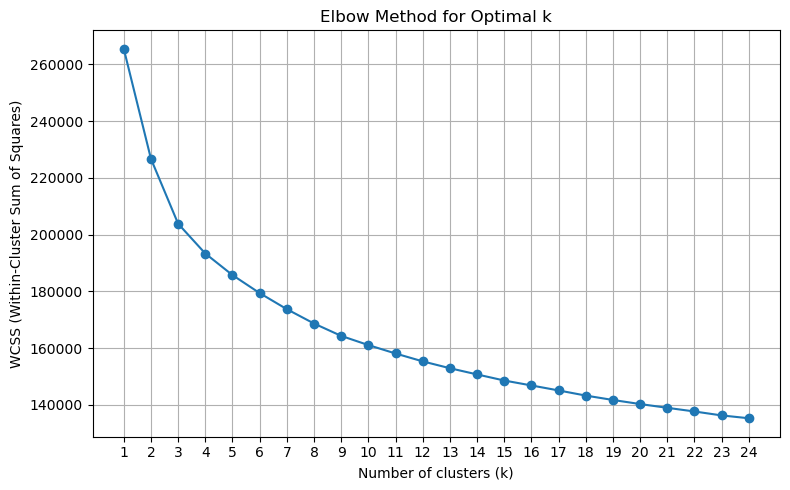

In [34]:
# Find the proper k with Elbow Method
wcss = []
K_range = range(1, 25)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_nba_cluster)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(K_range)
plt.grid(True)
plt.tight_layout()
plt.show()

# Cannot find the elbow for k

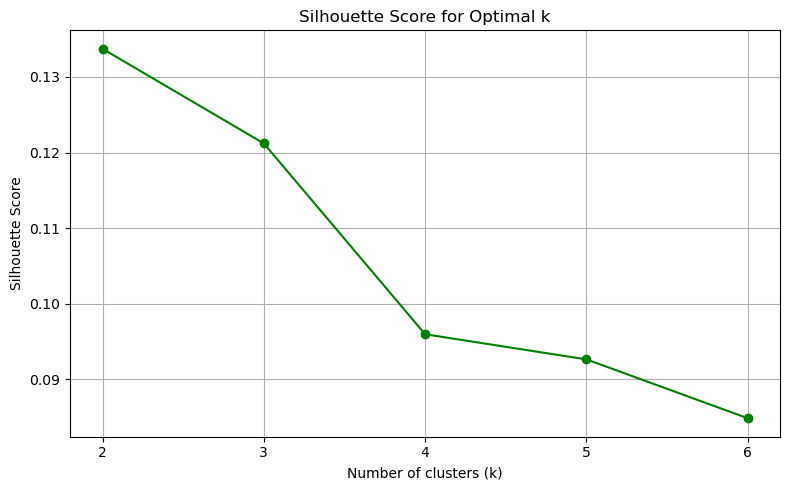

In [36]:
# With silhouette method
from sklearn.metrics import silhouette_score

silhouette_scores = []
K_range_silhouette = range(2, 7)

for k in K_range_silhouette:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(scaled_nba_cluster)
    score = silhouette_score(scaled_nba_cluster, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(K_range_silhouette, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(K_range_silhouette)
plt.grid(True)
plt.tight_layout()
plt.show()

### Cannot find a proper k (either the elbow or the peak) for the clustering, so we decided to use k=2

In [31]:
kmeans = KMeans(n_clusters=2, random_state=42)
nba_cluster['cluster'] = kmeans.fit_predict(scaled_nba_cluster)
display(nba_cluster.head())

,fg_pct_home,ft_pct_home,fg3_pct_home,ast_home,reb_home,fg_pct_away,ft_pct_away,fg3_pct_away,ast_away,reb_away,cluster
0,0.484,0.926,0.382,25.0,46.0,0.478,0.815,0.321,23.0,44.0,0
1,0.488,0.952,0.457,16.0,40.0,0.561,0.765,0.333,20.0,37.0,0
2,0.482,0.786,0.313,22.0,37.0,0.470,0.682,0.433,20.0,46.0,0
3,0.441,0.909,0.297,27.0,49.0,0.392,0.735,0.261,15.0,46.0,1
4,0.429,1.000,0.378,22.0,47.0,0.500,0.773,0.292,20.0,47.0,1


In [33]:
# Add the PC columns into nba_cluster
pca = PCA(n_components=2)
reduced = pca.fit_transform(scaled_nba_cluster)
nba_cluster['PCA1'] = reduced[:, 0]
nba_cluster['PCA2'] = reduced[:, 1]
nba_cluster

,fg_pct_home,ft_pct_home,fg3_pct_home,ast_home,reb_home,fg_pct_away,ft_pct_away,fg3_pct_away,ast_away,reb_away,cluster,PCA1,PCA2
0,0.484,0.926,0.382,25.0,46.0,0.478,0.815,0.321,23.0,44.0,0,0.600223,-0.168026
1,0.488,0.952,0.457,16.0,40.0,0.561,0.765,0.333,20.0,37.0,0,1.378888,0.668382
2,0.482,0.786,0.313,22.0,37.0,0.470,0.682,0.433,20.0,46.0,0,0.348675,0.722287
3,0.441,0.909,0.297,27.0,49.0,0.392,0.735,0.261,15.0,46.0,1,-1.456022,-1.276893
4,0.429,1.000,0.378,22.0,47.0,0.500,0.773,0.292,20.0,47.0,1,-0.299275,0.357590
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26646,0.419,0.821,0.421,24.0,50.0,0.366,0.643,0.375,17.0,43.0,1,-1.283369,-1.161714
26647,0.338,0.719,0.381,18.0,40.0,0.411,0.636,0.267,17.0,47.0,1,-2.210744,0.452630
26648,0.448,0.682,0.500,29.0,45.0,0.387,0.659,0.500,19.0,43.0,0,0.240385,-1.038625
26649,0.440,0.771,0.333,21.0,30.0,0.469,0.725,0.385,18.0,45.0,0,0.173093,0.962347


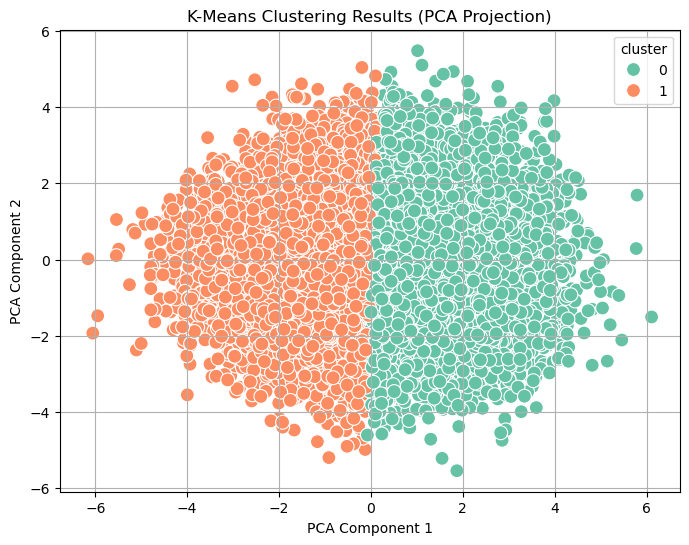

In [35]:
# plot the PCA 2-d graph
plt.figure(figsize=(8, 6))
sns.scatterplot(data=nba_cluster, x='PCA1', y='PCA2', hue='cluster', palette='Set2', s=100)
plt.title('K-Means Clustering Results (PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.savefig('K-Means.jpg', dpi=300, bbox_inches='tight')
plt.show()

### Findings
PC1 vertically separates two clusters, and along PC2, it distributes evenly.

The division likely captures some latent trait — for instance:
- One cluster may correspond to games where home teams dominate in shooting/rebounding.
- The other might reflect games where away teams perform better or the stats are more evenly matched.

The visualization indicates that there are many overlapped points here.

### Evaluation

Centroids of each cluster

In [37]:
centroids_scaled = kmeans.cluster_centers_
centroids_unscaled = scaler.inverse_transform(centroids_scaled)
centroids_df = pd.DataFrame(centroids_unscaled, columns=nba_cluster.iloc[:, :-3].columns)
display(centroids_df)

,fg_pct_home,ft_pct_home,fg3_pct_home,ast_home,reb_home,fg_pct_away,ft_pct_away,fg3_pct_away,ast_away,reb_away
0,0.493223,0.771328,0.402036,24.995032,40.810670,0.476907,0.768987,0.387825,23.306122,39.398609
1,0.429178,0.749740,0.311329,20.714084,45.864429,0.423336,0.748936,0.312251,19.738288,44.750093


### Findings
Cluster 0 performs better shooting performance, such as:
- fg_pct_home, ft_pct_home, fg3_pct_home, ast_home, fg_pct_away, ft_pct_away, fg3_pct_away, ast_away

Cluster 1 dominates in rebounds, likely representing slower-paced or more defensive games, such as:
- reb_home and reb_away

### Distance between the clusters

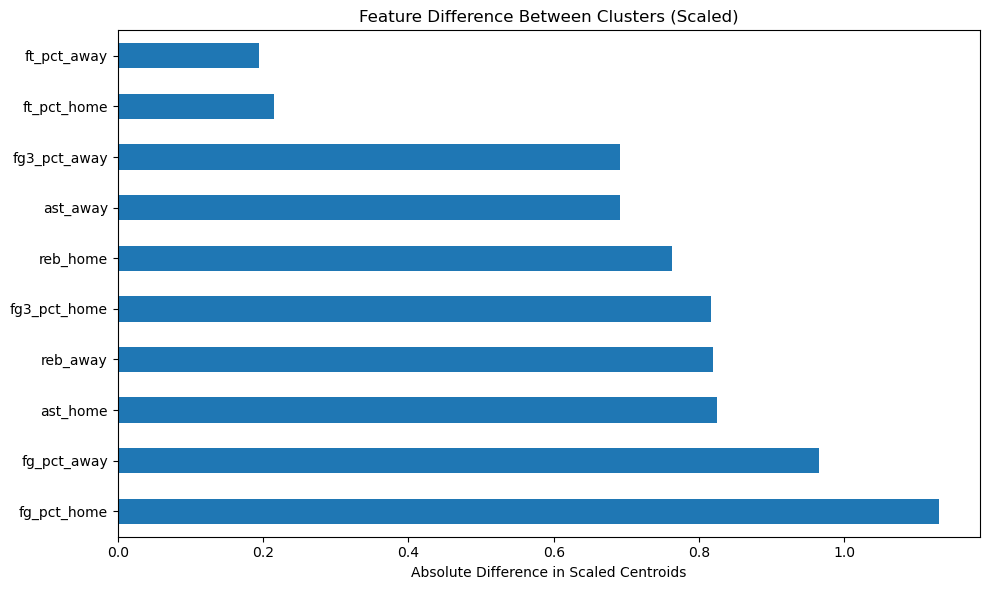

In [39]:
# Check the centroids across all the scaled features
centroids_scaled_df = pd.DataFrame(centroids_scaled, columns=nba_cluster.iloc[:, :-3].columns)

centroids_diff_scaled = centroids_scaled_df.iloc[0] - centroids_scaled_df.iloc[1]
centroids_diff_scaled = centroids_diff_scaled.abs().sort_values(ascending=False)

centroids_diff_scaled.plot(kind='barh', figsize=(10,6), title='Feature Difference Between Clusters (Scaled)')
plt.xlabel("Absolute Difference in Scaled Centroids")
plt.tight_layout()
plt.show()

### Findings
The distances between two clusters is mainly based on the fg_pct_home and fg_pct_away.

In [41]:
loadings = pd.DataFrame(pca.components_.T, 
                        columns=[f'PC{i+1}' for i in range(pca.n_components_)], 
                        index=X.columns)
loadings

,PC1,PC2
fg_pct_home,0.451103,-0.405135
ft_pct_home,0.094084,0.005605
fg3_pct_home,0.330229,-0.353037
ast_home,0.334302,-0.356823
reb_home,-0.322978,-0.250808
fg_pct_away,0.410585,0.449945
ft_pct_away,0.090461,0.038622
fg3_pct_away,0.296630,0.372285
ast_away,0.295501,0.366421
reb_away,-0.332352,0.210163


In [43]:
loadings['PC1'].abs().sort_values(ascending=False)

fg_pct_home     0.451103
fg_pct_away     0.410585
ast_home        0.334302
reb_away        0.332352
fg3_pct_home    0.330229
reb_home        0.322978
fg3_pct_away    0.296630
ast_away        0.295501
ft_pct_home     0.094084
ft_pct_away     0.090461
Name: PC1, dtype: float64

### Findings
fg_pct_home and fg_pct_away contribute to the variation of the full data the most.

In [52]:
from sklearn.metrics import silhouette_score

# +1 -> perfect clustering
# 0 -> overlopping clustering
# -1 -> incorrect clustering
score = silhouette_score(scaled_nba_cluster, kmeans.labels_)
print(f'Silhouette Score {score:.4f}')

Silhouette Score 0.1337


In [54]:
score = silhouette_score(reduced, kmeans.labels_)
print(f'Silhouette Score {score:.4f}')

Silhouette Score 0.3223


### Intra-cluster similarity & Inter-cluster dissimilarity

In [56]:
from sklearn.metrics import pairwise_distances

pca_data = nba_cluster[['PCA1', 'PCA2']].values
labels = nba_cluster['cluster'].values

distance_matrix = pairwise_distances(pca_data)

a = []
b = []

for i in range(len(pca_data)):
    same_cluster = labels == labels[i]
    other_clusters = labels != labels[i]

    if np.sum(same_cluster) > 1:
        a_i = np.mean(distance_matrix[i, same_cluster][distance_matrix[i, same_cluster] != 0])
    else: a_i = 0

    b_i = np.min([
        np.mean(distance_matrix[i, labels == j]) for j in np.unique(labels) if j != labels[i]
    ])

    a.append(a_i)
    b.append(b_i)

similarity_df = pd.DataFrame({
    'cluster': labels,
    'intra_cluster_dist': a,
    'inter_cluster_dist': b,
    'silhouette_score': [(b[i] - a[i]) / max(a[i], b[i]) if max(a[i], b[i]) != 0 else 0 for i in range(len(a))]
})

cluster_similarity_summary = similarity_df.groupby('cluster').agg({
    'intra_cluster_dist': 'mean',
    'inter_cluster_dist': 'mean',
    'silhouette_score': 'mean'
}).round(4)

display(cluster_similarity_summary)

,intra_cluster_dist,inter_cluster_dist,silhouette_score
cluster,,,
0,2.1041,3.1002,0.3023
1,1.9896,3.1002,0.3416


### Finding & Conclusion

The data failed to distinguish whether home team will win from the clusters we have made.
The silhouette score is 0.1337, meaning the clusters are not well-separated, and many points are close to the decision boundary between clusters.

The distance between two pricipal components are far enough, meaning that two PCs are well-separated.\
And the averag silhouette score is around 0.322, meaning that PCA successfull reduced and improved the performance of the k-means clustering at k=2. 

# Unsupervised Learning - K-means Clustering (Conducting PCA before clustering)

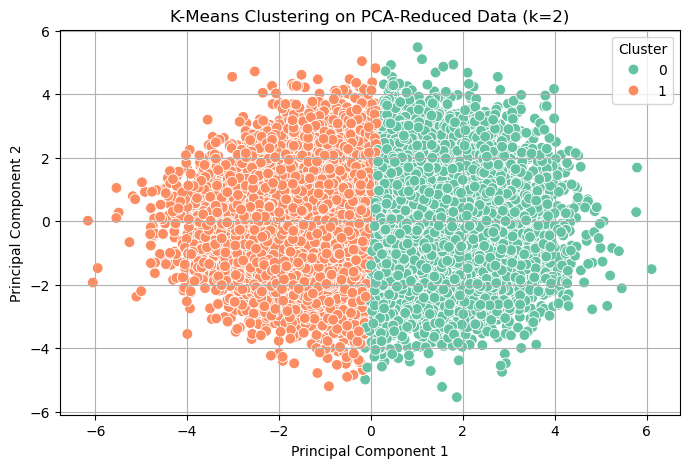

k=2: Silhouette Score = 0.3223


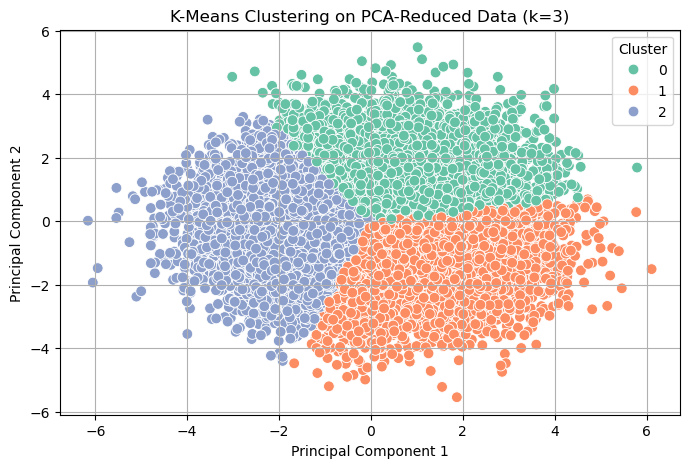

k=3: Silhouette Score = 0.3373


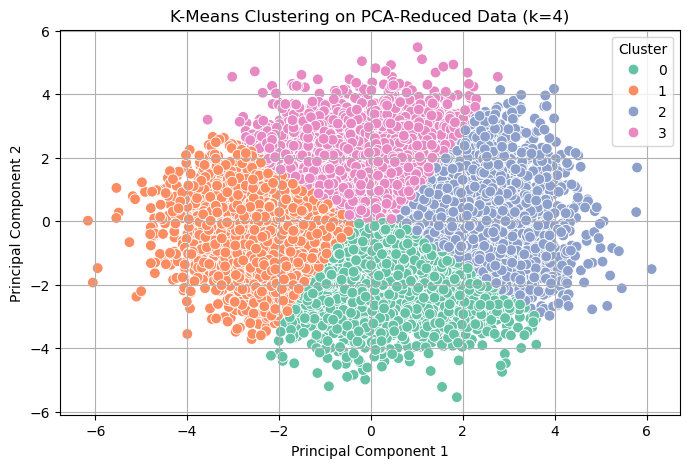

k=4: Silhouette Score = 0.3200


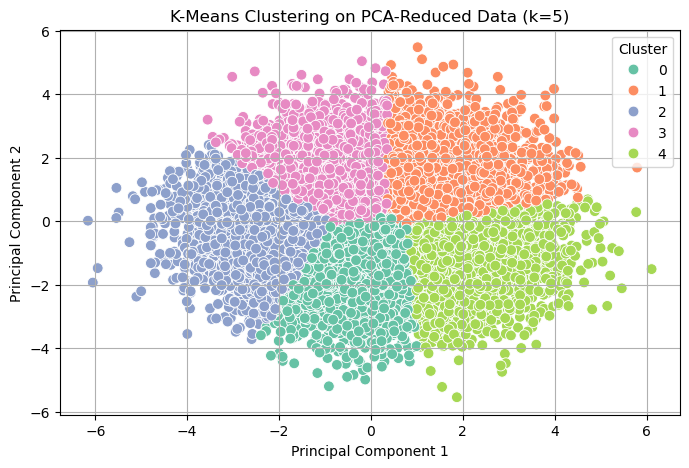

k=5: Silhouette Score = 0.3036


In [45]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_nba_cluster)
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])

for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(pca_data)
    
    # Add cluster labels to PCA dataframe
    pca_df[f'cluster_k{k}'] = labels

    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue=f'cluster_k{k}', palette='Set2', s=60)
    plt.title(f'K-Means Clustering on PCA-Reduced Data (k={k})')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.show()

    sil_score = silhouette_score(pca_data, labels)
    print(f'k={k}: Silhouette Score = {sil_score:.4f}')

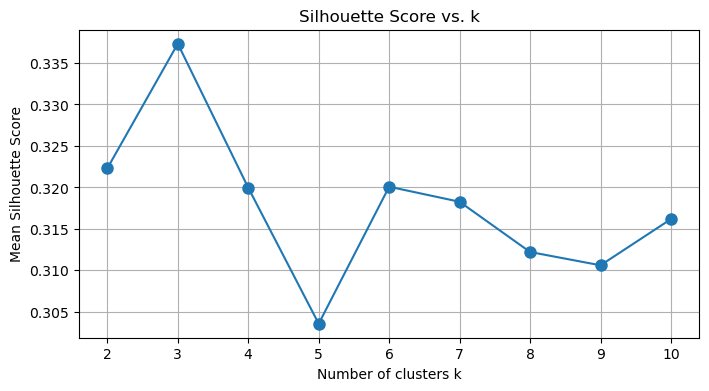

In [47]:
sil_scores = []
k_vals = range(2, 11)

for k in k_vals:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(pca_data)
    sil_scores.append(silhouette_score(pca_data, labels))

plt.figure(figsize=(8, 4))
plt.plot(k_vals, sil_scores, 'o-', markersize=8)
plt.title('Silhouette Score vs. k')
plt.xlabel('Number of clusters k')
plt.ylabel('Mean Silhouette Score')
plt.xticks(k_vals)
plt.grid(True)
plt.show()

### Findings

We got the highest Silhouette score, 0.3373 when number of clusters is 3.

### K = 3

In [49]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_nba_cluster)
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
display(pca_df)

,PC1,PC2
0,0.600223,-0.168026
1,1.378888,0.668382
2,0.348675,0.722287
3,-1.456022,-1.276893
4,-0.299275,0.357590
...,...,...
26547,-1.283369,-1.161714
26548,-2.210744,0.452630
26549,0.240385,-1.038625
26550,0.173093,0.962347


In [51]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(pca_data)
pca_df['cluster'] = labels
display(pca_df)

,PC1,PC2,cluster
0,0.600223,-0.168026,1
1,1.378888,0.668382,0
2,0.348675,0.722287,0
3,-1.456022,-1.276893,2
4,-0.299275,0.357590,2
...,...,...,...
26547,-1.283369,-1.161714,2
26548,-2.210744,0.452630,2
26549,0.240385,-1.038625,1
26550,0.173093,0.962347,0


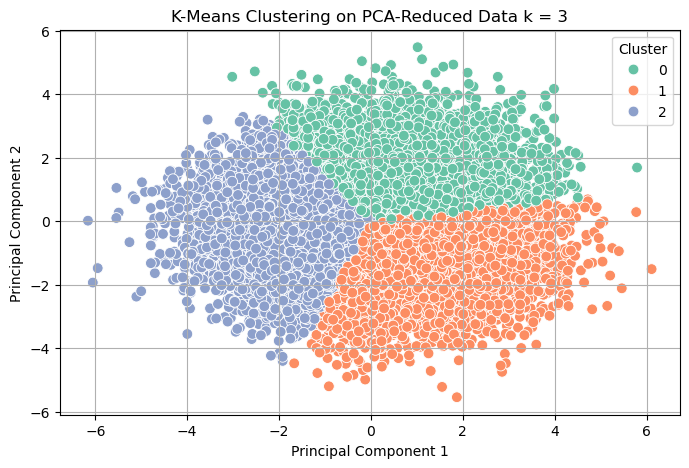

k=3: Silhouette Score = 0.3373


In [53]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster', palette='Set2', s=60)
plt.title('K-Means Clustering on PCA-Reduced Data k = 3')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

sil_score = silhouette_score(pca_data, labels)
print(f'k=3: Silhouette Score = {sil_score:.4f}')

### Evaluation

To inspect what drives each principal component in your PCA→K-Means pipeline

In [59]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pandas as pd
from IPython.display import display

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_nba_cluster)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(pca_data)

loadings = pd.DataFrame(
    pca.components_.T,
    index=scaled_nba_cluster.columns,
    columns=['PC1', 'PC2']
)

centroids_pc = pd.DataFrame(
    kmeans.cluster_centers_,
    columns=['PC1', 'PC2']
)
centroids_pc.index.name = 'cluster'

display(loadings)
display(centroids_pc)

,PC1,PC2
fg_pct_home,0.451103,-0.405135
ft_pct_home,0.094084,0.005605
fg3_pct_home,0.330229,-0.353037
ast_home,0.334302,-0.356823
reb_home,-0.322978,-0.250808
fg_pct_away,0.410585,0.449945
ft_pct_away,0.090461,0.038622
fg3_pct_away,0.296630,0.372285
ast_away,0.295501,0.366421
reb_away,-0.332352,0.210163


,PC1,PC2
cluster,,
0,0.654610,1.366753
1,1.044388,-1.147201
2,-1.496781,-0.165330


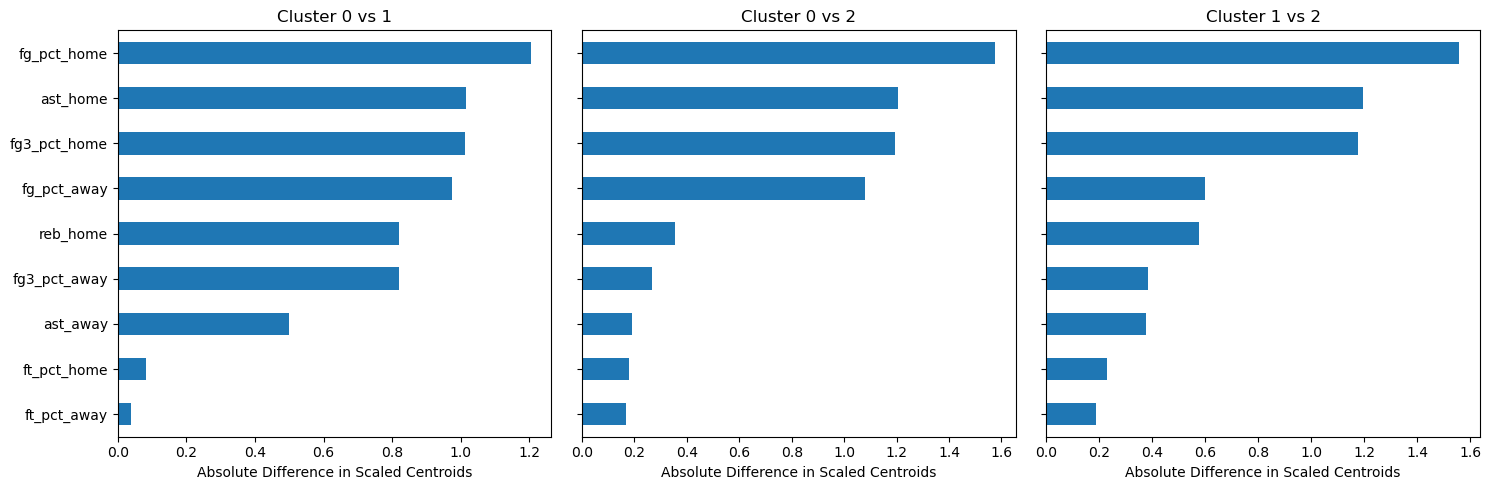

In [61]:
scaled_df = scaled_nba_cluster.copy()
scaled_df['cluster'] = labels

cluster_means = scaled_df.groupby('cluster').mean().iloc[:, :-1]

diff_0_1 = (cluster_means.loc[0] - cluster_means.loc[1]).abs()
diff_0_2 = (cluster_means.loc[0] - cluster_means.loc[2]).abs()
diff_1_2 = (cluster_means.loc[1] - cluster_means.loc[2]).abs()

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
for ax, diffs, pair in zip(axes,
                           [diff_0_1, diff_0_2, diff_1_2],
                           ["Cluster 0 vs 1", "Cluster 0 vs 2", "Cluster 1 vs 2"]):
    diffs.sort_values().plot.barh(ax=ax)
    ax.set_title(pair)
    ax.set_xlabel("Absolute Difference in Scaled Centroids")

plt.tight_layout()
plt.show()

### 📊 Cluster Archetypes (PCA→KMeans, k=3)

| Cluster | PC1 Score | PC2 Score | Description                                      |
|:-------:|----------:|----------:|--------------------------------------------------|
| **0**   | **High**  | **High**  | **“Away-Shootout”**: Games with very high overall offensive efficiency (FG%, AST) in which the **away** team out-shoots and out-assists the home side. |
| **1**   | **High**  | **Low**   | **“Home-Shootout”**: Games with very high offensive efficiency where the **home** team dominates shooting and playmaking. |
| **2**   | **Low**   | **Mid**   | **“Rebound-Battles”**: Games with lower shooting/assist numbers (i.e. lower PC1) and stronger rebounding emphasis—more defensive, possession-oriented contests.    |


In [41]:
from sklearn.metrics import pairwise_distances
distance_matrix = pairwise_distances(pca_data)

a = []
b = []

for i in range(len(pca_data)):
    same_cluster = labels == labels[i]
    other_clusters = labels != labels[i]

    if np.sum(same_cluster) > 1:
        a_i = np.mean(distance_matrix[i, same_cluster][distance_matrix[i, same_cluster] != 0])
    else:
        a_i = 0

    b_i = np.min([
        np.mean(distance_matrix[i, labels == j]) for j in np.unique(labels) if j != labels[i]
    ])

    a.append(a_i)
    b.append(b_i)

similarity_df = pd.DataFrame({
    'cluster': labels,
    'intra_cluster_dist': a,
    'inter_cluster_dist': b,
    'silhouette_score': [(b[i] - a[i]) / max(a[i], b[i]) if max(a[i], b[i]) != 0 else 0 for i in range(len(a))]
})

cluster_similarity_summary = similarity_df.groupby('cluster').agg({
    'intra_cluster_dist': 'mean',
    'inter_cluster_dist': 'mean',
    'silhouette_score': 'mean'
}).round(4)

display(cluster_similarity_summary)

,intra_cluster_dist,inter_cluster_dist,silhouette_score
cluster,,,
0,1.6940,2.6081,0.3287
1,1.7198,2.6479,0.3283
2,1.6806,2.6987,0.3528


### 🧪 Clustering Evaluation Comparison

We tested two different clustering strategies to evaluate the structure of NBA game data:

| Strategy                | Clusters | Avg. Intra-Cluster Distance | Avg. Inter-Cluster Distance | Avg. Silhouette Score |
|-------------------------|----------|------------------------------|------------------------------|------------------------|
| **K-Means → PCA (k=2)** | 2        | ~2.05                        | 3.10                         | ~0.322                 |
| **PCA → K-Means (k=3)** | 3        | ~1.70                        | ~2.65                        | ~0.336                 |

---

### 🔍 Interpretation

- **Intra-Cluster Distance**: Scenario 2 (PCA-first) shows smaller distances (~1.70), meaning the clusters are more compact and internally consistent.
- **Inter-Cluster Distance**: Scenario 1 has slightly greater separation (3.10), but this is expected due to fewer (only 2) broader clusters.
- **Silhouette Score**: Scenario 2 produces higher silhouette scores, especially for Cluster 2 (0.3528), indicating better balance between cohesion and separation.

---

### ✅ Conclusion

> **PCA before K-Means (k=3)** produces the **best clustering results** overall. It leads to tighter, better-separated clusters that align more naturally with the data's structure.

We recommend using this pipeline for further analysis and interpretation of NBA team performance patterns.

